In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('MedicalExpenses.csv', index_col=False)

In [3]:
df.head()

,familysize,expenses
0,2,7.15
1,3,6.93
2,3,7.57
3,5,6.10
4,4,10.30


In [4]:
df.shape

(33, 2)

Data Visualization
To visualize distribution of data

Regression line is drawn over the points

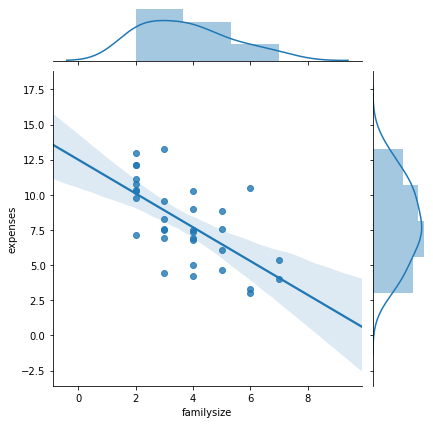

In [7]:
sns.jointplot(x=df['familysize'], y=df['expenses'], data=df, kind='reg')

# Splitting data into test and train

In [42]:

x_train, x_test, y_train, y_test = train_test_split(df['familysize'], df['expenses'], test_size=0.2,random_state=20 )

x_train = np.reshape(x_train.values, (-1, 1))
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test.values, (-1,1))
y_train = np.reshape(y_train.values, (-1,1))
y_test = np.reshape(y_test.values, (-1,1))
#np.random.random(size=(10,1))
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (26, 1)
Test - Predictors shape (7, 1)
Train - Target shape (26, 1)
Test - Target shape (7, 1)


# Linear Regression using Scikit

This is the linear regression model implemented using scikit library.

In [43]:
# Creating clsssifiefies  which is an object oglinear regression calss
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model(to train the model)
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# check how the xtest prediction looks like
prediction = cls.predict(x_test)
print(prediction)

[[7.97140076]
 [9.21619794]
 [7.97140076]
 [9.21619794]
 [9.21619794]
 [7.97140076]
 [6.72660357]]


In [54]:
# check how the xtest prediction looks like
prediction = cls.predict(y_test)
print(prediction)

[[0.12917847]
 [2.65611677]
 [4.51086458]
 [4.324145  ]
 [7.38634608]
 [3.80133018]
 [7.14983461]]


In [55]:
# Check the accuracy 
cls.score(x_test,y_test)

-0.6355250200426876

In [45]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [46]:

print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[-1.24479719]]


In [47]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [12.95058951]


In [48]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 5.735312276814511


In [49]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value -0.6355250200426876


Text(0.5, 1.0, 'Linear Regression')

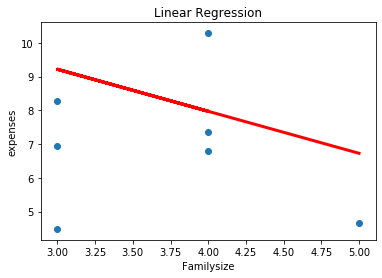

In [51]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Familysize')
plt.ylabel('expenses')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

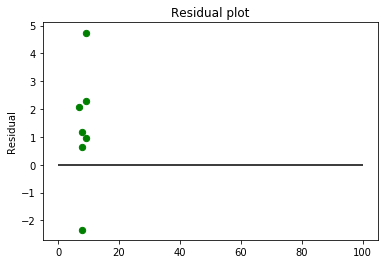

In [52]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')